In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
titanic = sns.load_dataset('titanic')

titanic.head(10)

In [0]:
titanic.shape

(891, 15)

In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [0]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [0]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

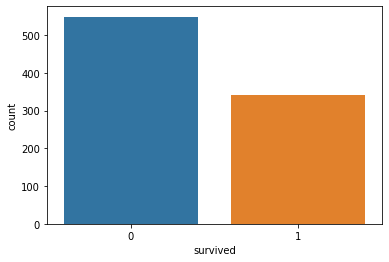

In [0]:
sns.countplot(titanic.survived);

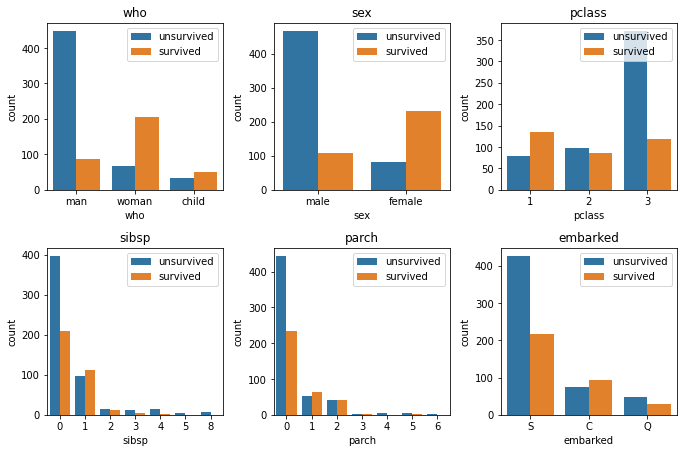

In [0]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(3*3.2, 2*3.2))

for r in range(0,2):
  for c in range(0,3):
    i = r*3 + c
    ax = axs[r][c]
    sns.countplot(titanic[cols[i]], hue=titanic.survived, ax=ax)
    ax.set_title(cols[i])
    ax.legend(['unsurvived', 'survived'], loc='upper right')
plt.tight_layout()

In [0]:
titanic.groupby('sex', axis=0)[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [0]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


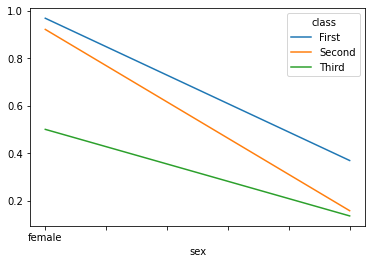

In [0]:
titanic.pivot_table('survived', index='sex', columns='class').plot();

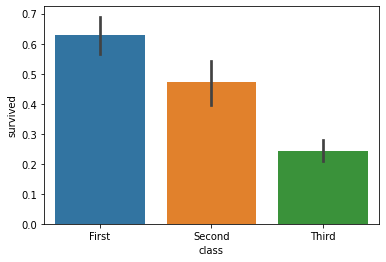

In [0]:
sns.barplot(x='class', y='survived', data=titanic);

In [0]:
age = pd.cut(titanic.age, [0, 18, 80])

In [0]:
age = pd.Categorical(age).codes + 1

In [0]:
titanic.pivot_table('survived', ['sex', age], 'class')

class        First    Second     Third
sex                                   
female 0  1.000000  1.000000  0.595238
       1  0.909091  1.000000  0.511628
       2  0.972973  0.900000  0.423729
male   0  0.238095  0.222222  0.095745
       1  0.800000  0.600000  0.215686
       2  0.375000  0.071429  0.133663

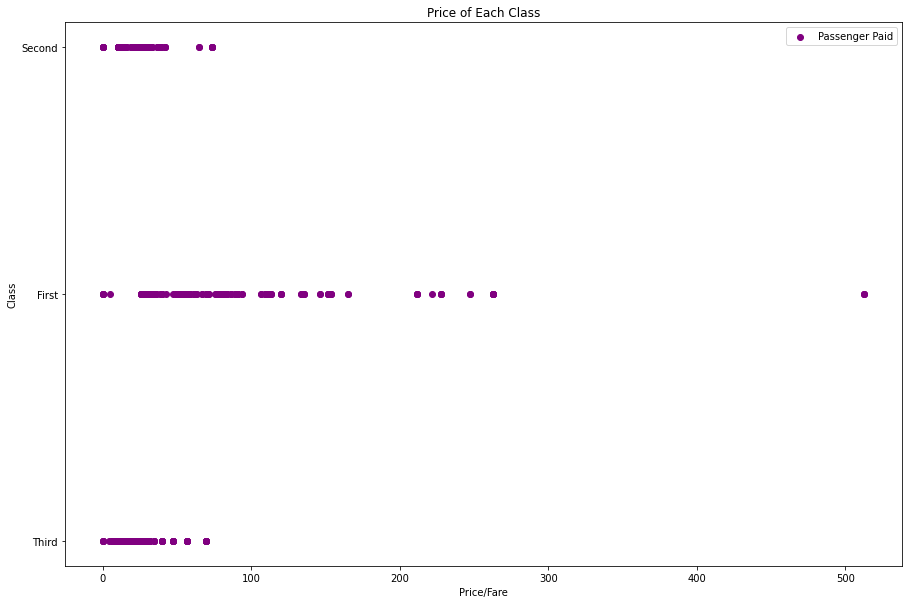

In [0]:
plt.figure(figsize=(15,10))
plt.scatter(titanic.fare, titanic['class'], color='purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [0]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [0]:
 titanic.shape

(891, 15)

In [0]:
titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1, inplace=True)

In [0]:
titanic.dropna(subset=['embarked', 'age'], inplace=True)

In [0]:
titanic.shape

(712, 8)

In [0]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [0]:
titanic.sex.value_counts()

male      453
female    259
Name: sex, dtype: int64

In [0]:
titanic.sex = pd.Categorical(titanic.sex).codes+1

In [0]:
titanic.embarked = pd.Categorical(titanic.embarked).codes+1

In [0]:
titanic.embarked.value_counts()

3    554
1    130
2     28
Name: embarked, dtype: int64

In [0]:
titanic.dtypes

survived      int64
pclass        int64
sex            int8
age         float64
sibsp         int64
parch         int64
fare        float64
embarked       int8
dtype: object

In [0]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,-1.492803,0.747599,0.117556,-0.539048,-0.503861,0.261289,0.530572
1,-1.492803,0.747599,0.607589,-0.539048,0.624867,2.102763,0.530572
2,-0.303160,0.747599,0.397575,-0.539048,-0.503861,-0.176799,0.530572
3,0.886482,0.747599,0.047551,-0.539048,-0.503861,-0.500577,0.530572
4,0.886482,0.747599,-0.722500,-0.539048,-0.503861,-0.502738,0.530572
...,...,...,...,...,...,...,...
564,0.886482,-1.337616,0.677593,-0.539048,5.139780,-0.120911,-0.732588
565,-0.303160,0.747599,0.257565,-0.539048,-0.503861,-0.422259,0.530572
566,-0.303160,0.747599,-0.932514,-0.539048,-0.503861,-0.176799,0.530572
567,-0.303160,0.747599,0.677593,-0.539048,-0.503861,-0.176799,0.530572


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
def models(X_train, y_train):
  log = LogisticRegression(random_state=0)
  log.fit(X_train, y_train)

  knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
  knn.fit(X_train, y_train)

  forest = RandomForestClassifier()
  forest.fit(X_train, y_train)

  SVC_lin = SVC(kernel='linear', random_state=0)
  SVC_lin.fit(X_train, y_train)

  SVC_rbf = SVC(kernel='rbf', random_state=0)
  SVC_rbf.fit(X_train, y_train)

  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, y_train)
  
  metrics = {'log_accuracy': [log.score(X_test, y_test)],
             'knn_accuracy': [knn.score(X_test, y_test)],
             'forest_accuracy': [forest.score(X_test, y_test)],
             'SVC_lin_accuracy': [SVC_lin.score(X_test, y_test)],
             'SVC_rbf_accuracy': [SVC_rbf.score(X_test, y_test)],
             'gauss_accuracy': [gauss.score(X_test, y_test)],
             'tree_accuracy': [tree.score(X_test, y_test)]
            }
  return metrics, log, knn, forest, SVC_lin, SVC_rbf, gauss, tree

In [0]:
models = models(X_train, y_train)

In [0]:
models[0]

{'SVC_lin_accuracy': [0.7902097902097902],
 'SVC_rbf_accuracy': [0.7972027972027972],
 'forest_accuracy': [0.7832167832167832],
 'gauss_accuracy': [0.7202797202797203],
 'knn_accuracy': [0.7552447552447552],
 'log_accuracy': [0.8181818181818182],
 'tree_accuracy': [0.7202797202797203]}

In [0]:
metrics = models[0]

In [0]:
metrics['log_accuracy']

[0.8181818181818182]

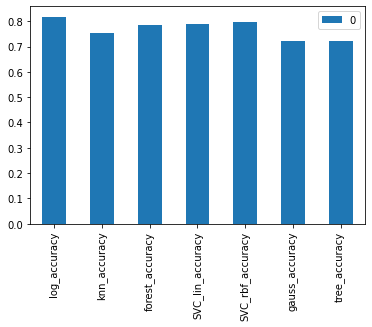

In [0]:
pd.DataFrame.from_dict(data=metrics).T.plot.bar()

In [0]:
log_model = models[1]
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
forest_model = models[3]

In [0]:
log = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
np.random.seed(0)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7832167832167832

In [0]:
forest.feature_importances_

array([0.10021188, 0.23486751, 0.27601046, 0.04976212, 0.04052888,
       0.26707824, 0.03154091])

In [0]:
df = pd.DataFrame({'feature': X.columns,
                   'importance': forest.feature_importances_})
df = df.sort_values('importance', ascending=True).set_index('feature')


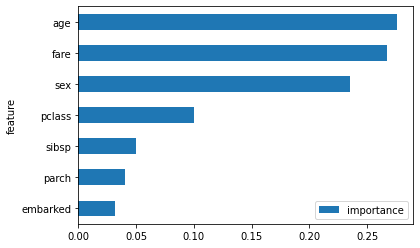

In [0]:
 df.plot.barh();

In [0]:
y_pred = log_model.predict(X_test)

In [0]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [0]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,2,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,2,35.0,0,0,8.0500,3


In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('encoding', one_hot, ['pclass', 'sex', 'embarked', 'sibsp'])],  remainder='passthrough')
transformer.fit_transform(X)



array([[ 0.    ,  0.    ,  1.    , ..., 22.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ..., 38.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ..., 26.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ..., 19.    ,  0.    , 30.    ],
       [ 1.    ,  0.    ,  0.    , ..., 26.    ,  0.    , 30.    ],
       [ 0.    ,  0.    ,  1.    , ..., 32.    ,  0.    ,  7.75  ]])

In [0]:
np.random.seed(0)
log_new = LogisticRegression()
forest_new = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_new.fit(X_train, y_train)
forest_new.fit(X_train, y_train)

print(log_new.score(X_test, y_test))
print(forest_new.score(X_test, y_test))

0.8181818181818182
0.8111888111888111


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int8   
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 40.3 KB


In [0]:
np.random.seed(0)
_X = titanic.drop('survived', axis=1)
_y = titanic.survived
_X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size=0.2)
forest_new_ = RandomForestClassifier()
forest_new_.fit(_X_train, _y_train)
forest_new_.score(_X_test, _y_test)

0.8111888111888111

In [0]:
log_new_ = LogisticRegression()
log_new_.fit(_X_train, _y_train)
log_new_.score(_X_test, _y_test)

0.8181818181818182